# Generating outliers in tabular data

This tutorial shows how to generate outliers (extreme values) by generating data points with a z-score greater than 3.

In [5]:
from badgers.generators.tabular_data.outliers import *
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def plot_outliers(X, outliers, y):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    # plot original data
    for i in range(len(np.unique(y))):
        ix = np.where(y == i)
        axes[0].scatter(X[ix,0],X[ix,1], c = f'C{i}', label = f'{i}')
        axes[1].scatter(X[ix,0],X[ix,1], c = f'C{i}', label = f'{i}')
    # add transformed outliers
    axes[1].scatter(outliers[:,0],outliers[:,1], marker = 'x', c = f'black', label = 'outliers')
    # titles and co
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    axes[0].set_xlabel('1st dimension')
    axes[0].set_ylabel('2nd dimension')
    axes[1].set_xlabel('1st dimension')
    axes[1].set_ylabel('2nd dimension')
    axes[1].legend(ncol=1, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    return fig, axes


## Setup random generator

In [7]:
from numpy.random import default_rng
seed = 0
rng = default_rng(seed)

## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [8]:
# load data
X, y = make_blobs(centers=4, random_state=0, cluster_std=0.5)
X = pd.DataFrame(data=X, columns=['dimension_0', 'dimension_1'])
y = pd.Series(y)

## Generating outliers directly with the transformers

### Generate outliers using z-score sampling

The transformer generates data points with a z-score greater than 3 for each dimension

In [10]:
trf = ZScoreSamplingGenerator(n_outliers=10, random_generator=rng)
outliers, _ = trf.generate(X.copy(), y)

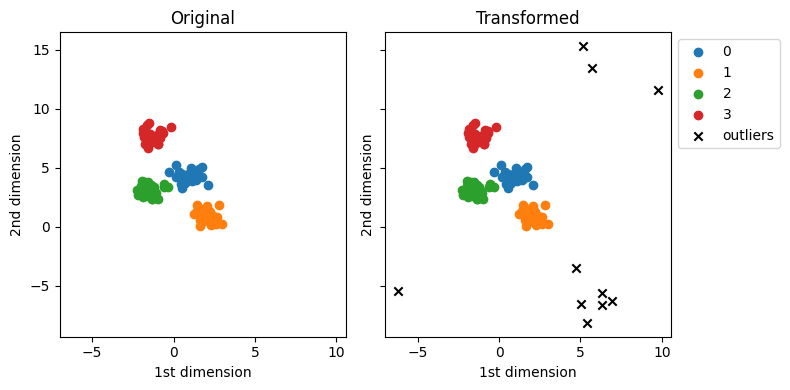

In [12]:
fig, axes = plot_outliers(X.values, outliers, y.values)

### Generate outliers using hypersphere sampling

The transformer generates data points on a hypersphere of radius greater than 3 sigmas

In [13]:
trf = HypersphereSamplingGenerator(n_outliers=25)
outliers, _ = trf.generate(X.copy(), y)

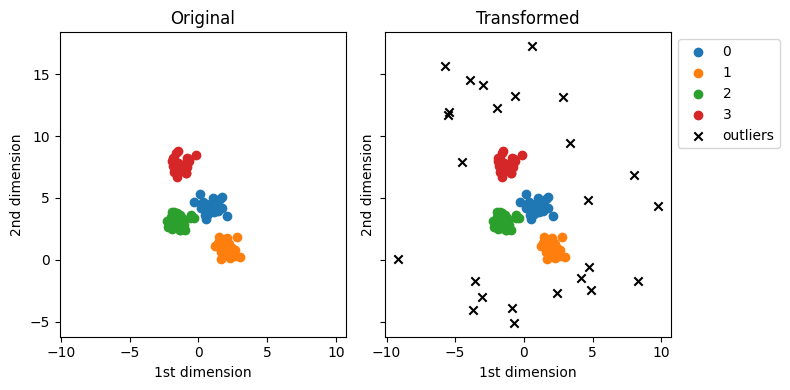

In [14]:
fig, axes = plot_outliers(X.values, outliers, y.values)

### Generate outliers using independent histogram sampling


In [15]:
trf = IndependentHistogramsGenerator(n_outliers=20)
outliers, _ = trf.generate(X.copy(), y)

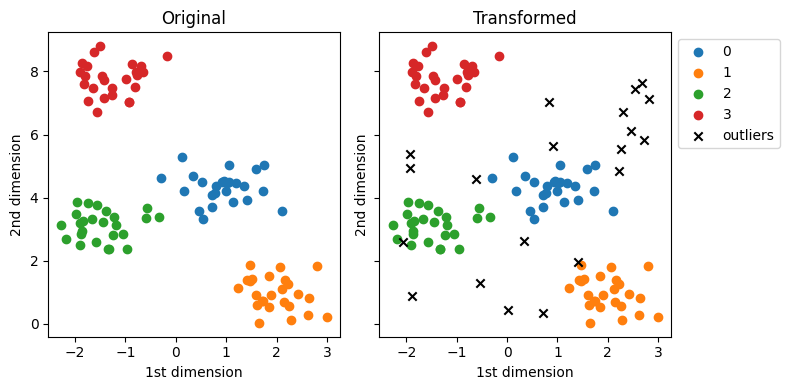

In [16]:
fig, axes = plot_outliers(X.values, outliers, y.values)

### Generate outliers using histogram sampling

**Note** this only works for datasets with low dimensionality (5 dimensions or less).
If you wish to apply it with a dataset with more than 5 dimensions, first apply a dimensionality reduction technique.

In [17]:
trf = HistogramSamplingGenerator(n_outliers=20)
outliers, _ = trf.generate(X.copy(), y)

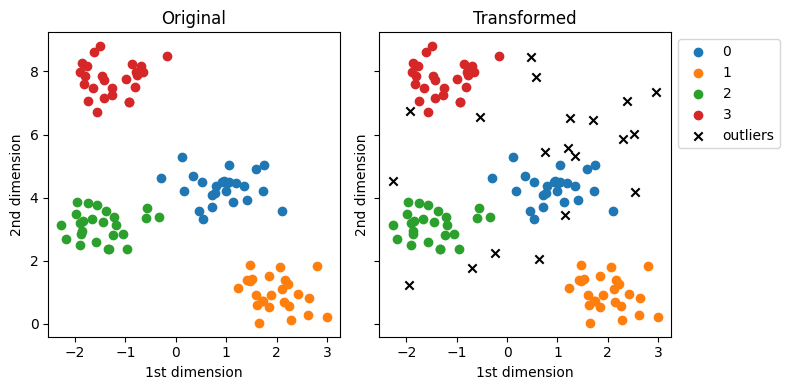

In [18]:
fig, axes = plot_outliers(X.values, outliers, y.values)

### Generate outliers using low density sampling


In [19]:
trf = LowDensitySamplingGenerator(n_outliers=10, threshold_low_density=0.25)
outliers, _ = trf.generate(X.copy(), y, max_samples=100)

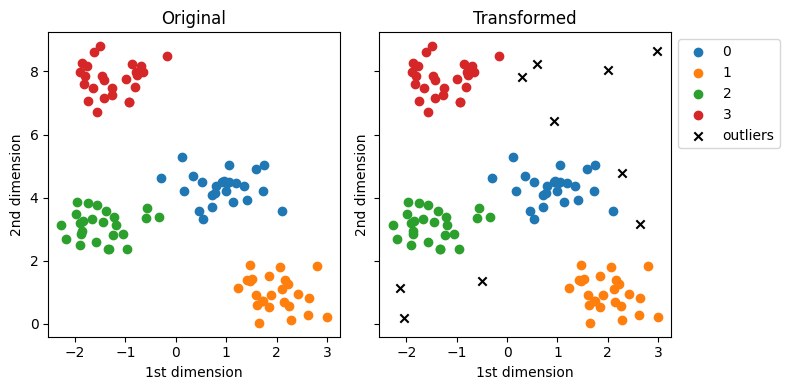

In [20]:
fig, axes = plot_outliers(X.values, outliers, y.values)

## Generate outliers by first reducing the dimensions and then apply an outlier transformer

### Dimensionality reduction and z-score sampling
Here are a couple of examples on how to generate outliers by first applying dimensionality reduction methods from the slearn.decomposition module (like PCA, KernelPCA, etc.) and then applying the ZScore transformer

In [21]:
# generate some data with higher dimensionality
X, y = make_blobs(n_features=10, centers=4, cluster_std=0.60, random_state=0)

In [22]:
from sklearn.decomposition import PCA, KernelPCA, FastICA

In [23]:
trf = DecompositionAndOutlierGenerator(
    decomposition_transformer=PCA(n_components=3), 
    outlier_generator=ZScoreSamplingGenerator(n_outliers=20)
)
outliers, _ = trf.generate(X.copy(), y)

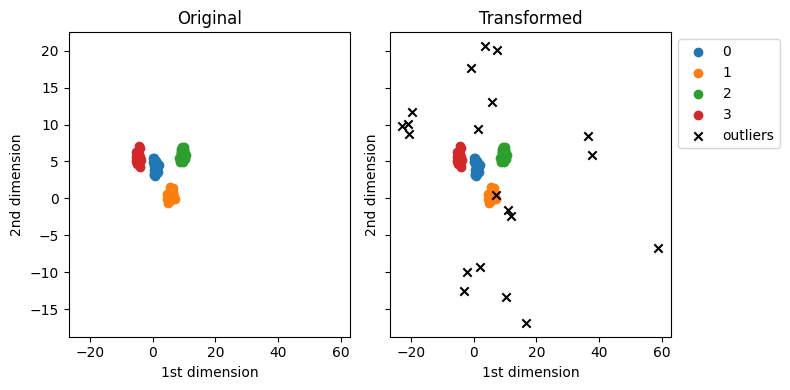

In [24]:
fig, axes = plot_outliers(X, outliers, y)

Instread of PCA one can use any class from sklearn.decomposition module that provides a  `inverse_transform` method.

In [25]:
trf = DecompositionAndOutlierGenerator(
    decomposition_transformer=KernelPCA(n_components=3, fit_inverse_transform=True), 
    outlier_generator=ZScoreSamplingGenerator(n_outliers=20)
)
outliers, _ = trf.generate(X.copy(), y)

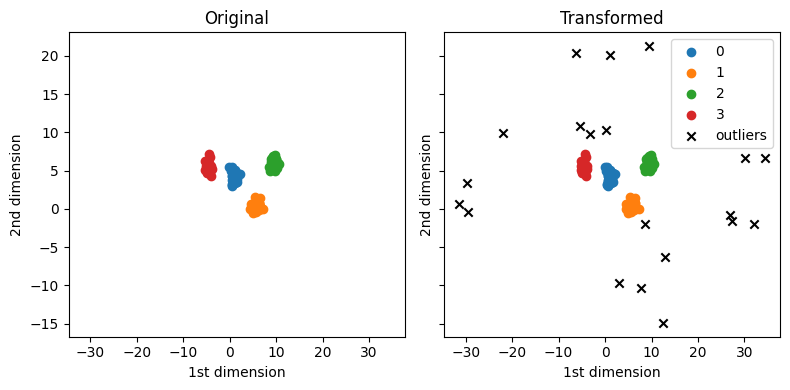

In [26]:
fig, axes = plot_outliers(X, outliers, y)

Here is yet another example specifying keywords arguments for the decomposition method

In [27]:
trf = DecompositionAndOutlierGenerator(
    decomposition_transformer=FastICA(n_components=3, whiten='unit-variance'), 
    outlier_generator=ZScoreSamplingGenerator(n_outliers=20)
)
outliers, _ = trf.generate(X.copy(), y)

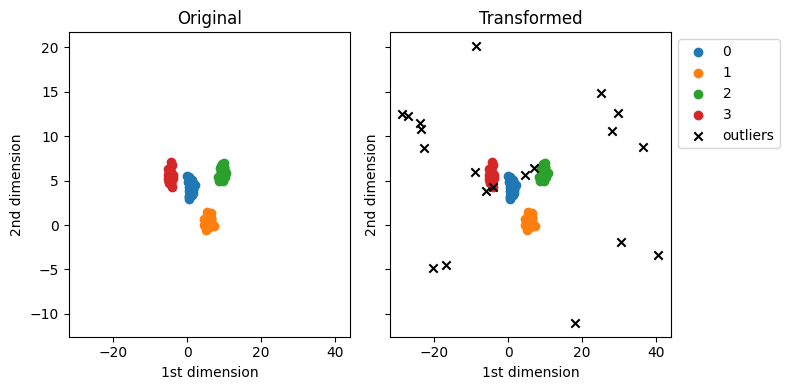

In [28]:
fig, axes = plot_outliers(X, outliers, y)

### Using hypersphere sampling with dimension reduction techniques

Again one can first apply a dimensionality reduction techniques first and then apply the transformer

In [29]:
trf = DecompositionAndOutlierGenerator(
    decomposition_transformer=FastICA(n_components=3, whiten='unit-variance'), 
    outlier_generator=HypersphereSamplingGenerator(n_outliers=20)
)
outliers, _ = trf.generate(X.copy(), y)

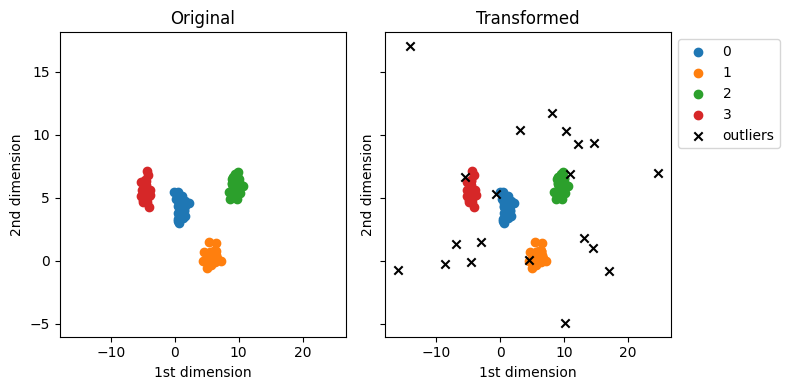

In [30]:
fig, axes = plot_outliers(X, outliers, y)

### Using histogram sampling with dimension reduction techniques

Here again, one can first apply a dimensionality reduction techniques first and then apply the transformer

In [31]:
trf = DecompositionAndOutlierGenerator(
    decomposition_transformer=FastICA(n_components=3, whiten='unit-variance'), 
    outlier_generator=HistogramSamplingGenerator(n_outliers=20)
)
outliers, _ = trf.generate(X.copy(), y)

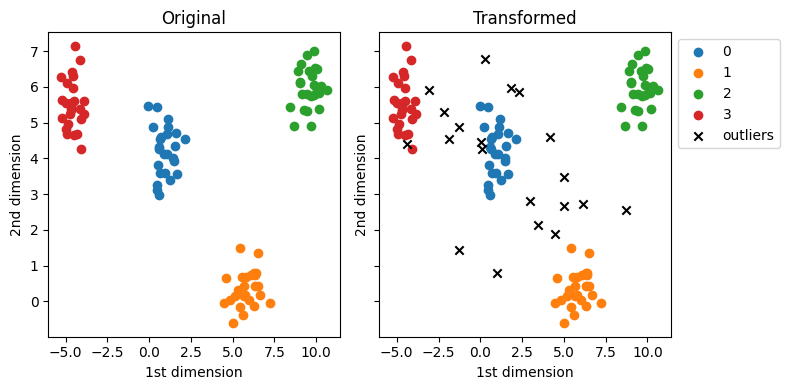

In [32]:
fig, axes = plot_outliers(X, outliers, y)